In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ENB2012_data.csv')

Ecotect'te simüle edilmiş 12 farklı bina şekli kullanarak enerji analizi yapıyoruz. Binalar, diğer parametrelerin yanı sıra cam alanına, cam alanı dağılımına ve yönüne göre farklılık gösterir.

Öznitelik Bilgileri:

Veri kümesi sekiz öznitelik (veya X1 ... X8 ile gösterilen özellikler) ve iki yanıt (veya y1 ve y2 ile gösterilen sonuçlar) içerir. Amaç, iki yanıtın her birini tahmin etmek için sekiz özelliği kullanmaktır.

Özellikle:
X1 Göreli Kompaktlık
X2 Yüzey Alanı
X3 Duvar Alanı
X4 Çatı Alanı
X5 Toplam Yükseklik
X6 Yönü
X7 Cam Alanı
X8 Cam Alanı Dağılımı
y1 ısıtma yükü
y2 Soğutma Yükü

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [18]:
df.columns = ["Relative_Compactness","Surface_Area","Wall_Area",
                "Roof_Area", "Overall_Height","Orientation","Glazing_Area",
                "Glazing_Area_Distribution", "Heating_Load", "Cooling_Load"]
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [37]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [36]:
df['Wall_Area'].value_counts() #örnek seçimi ve değer sayıları kontrol

294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: Wall_Area, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

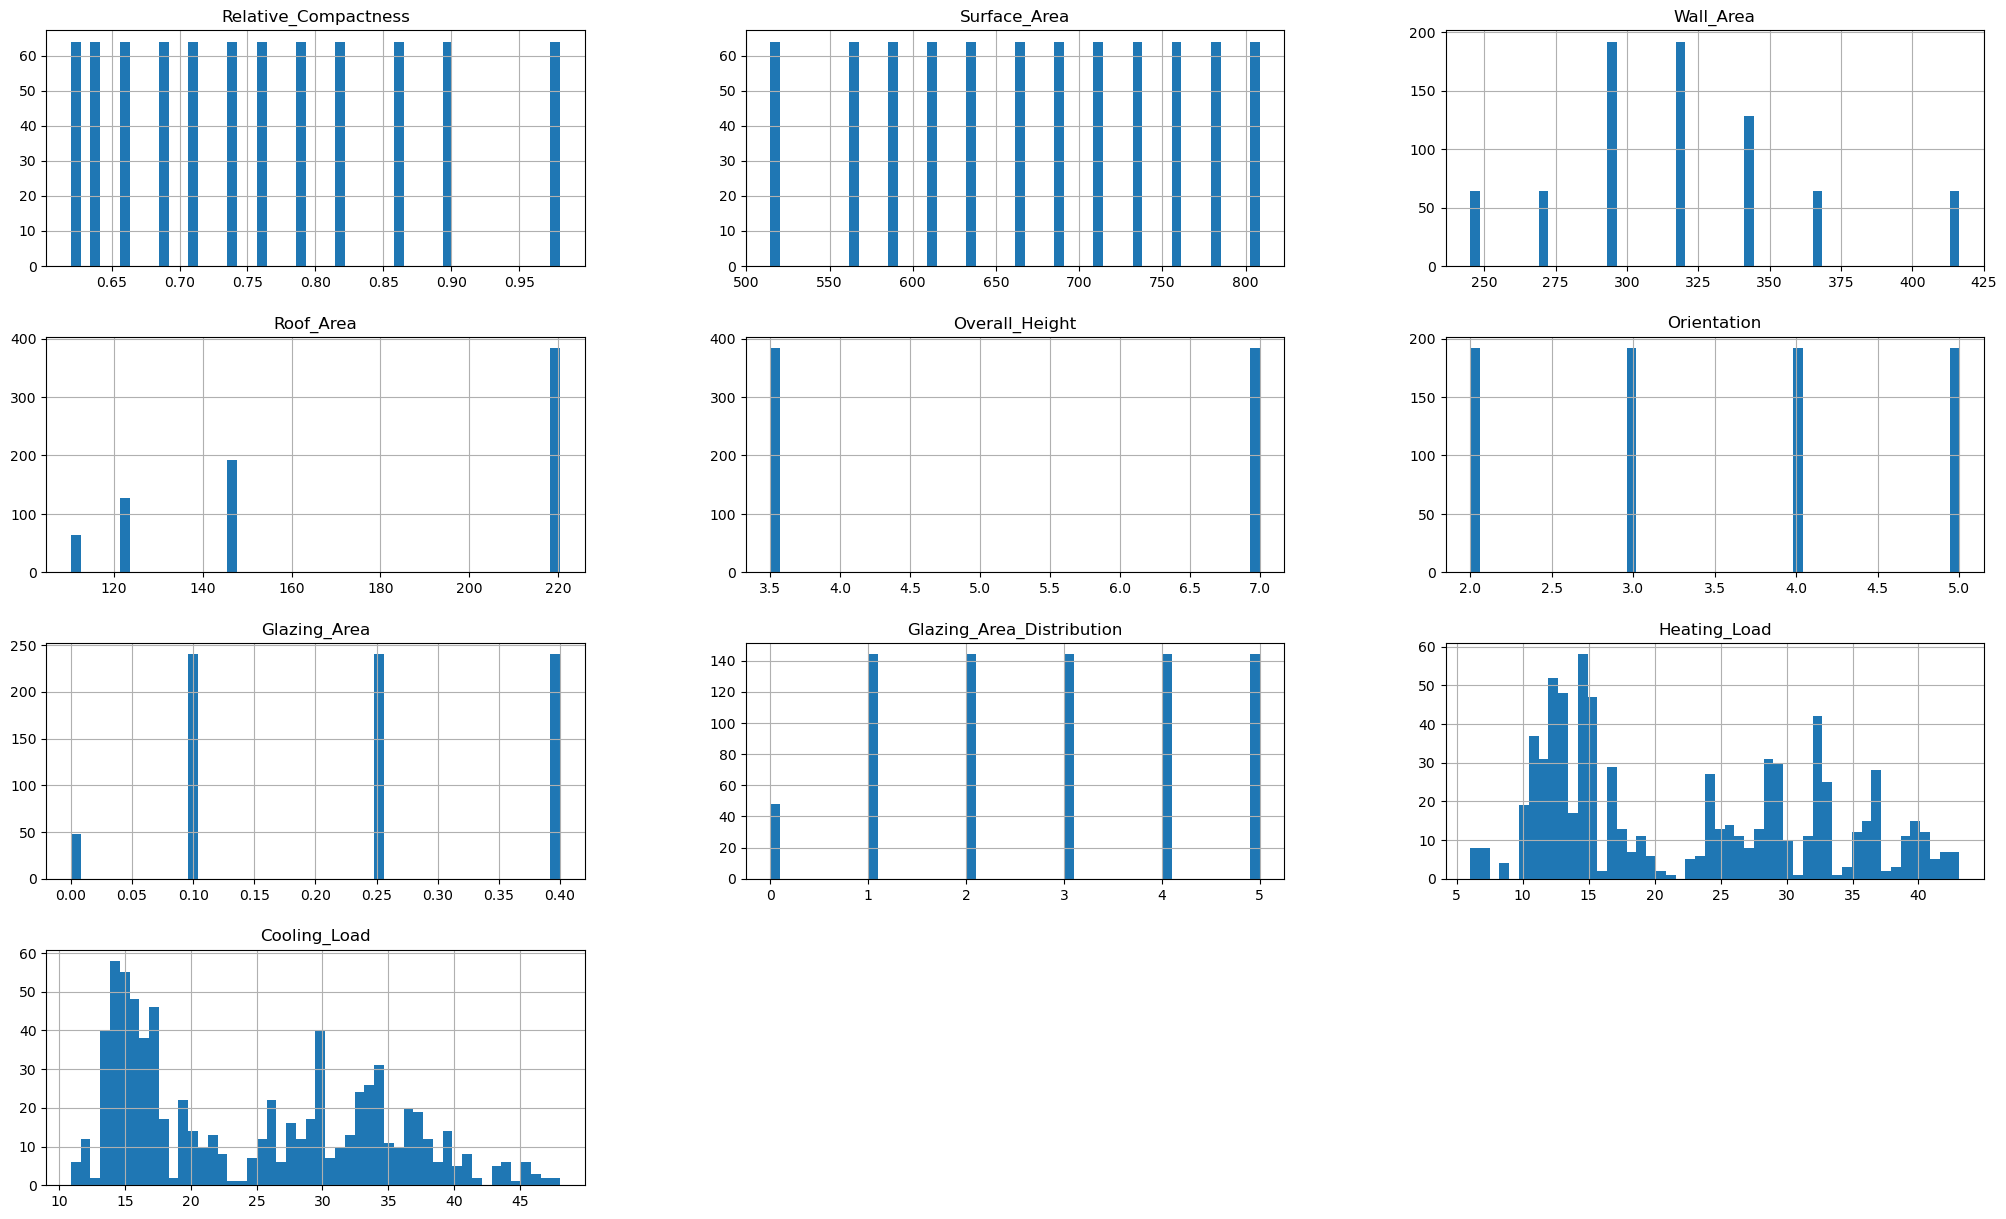

In [39]:
df.hist(figsize=(25,15),bins=50) # değer gösterimi her sütun için 
plt.show

## Tüm sütunlar arası Correlation değerleri

<Axes: >

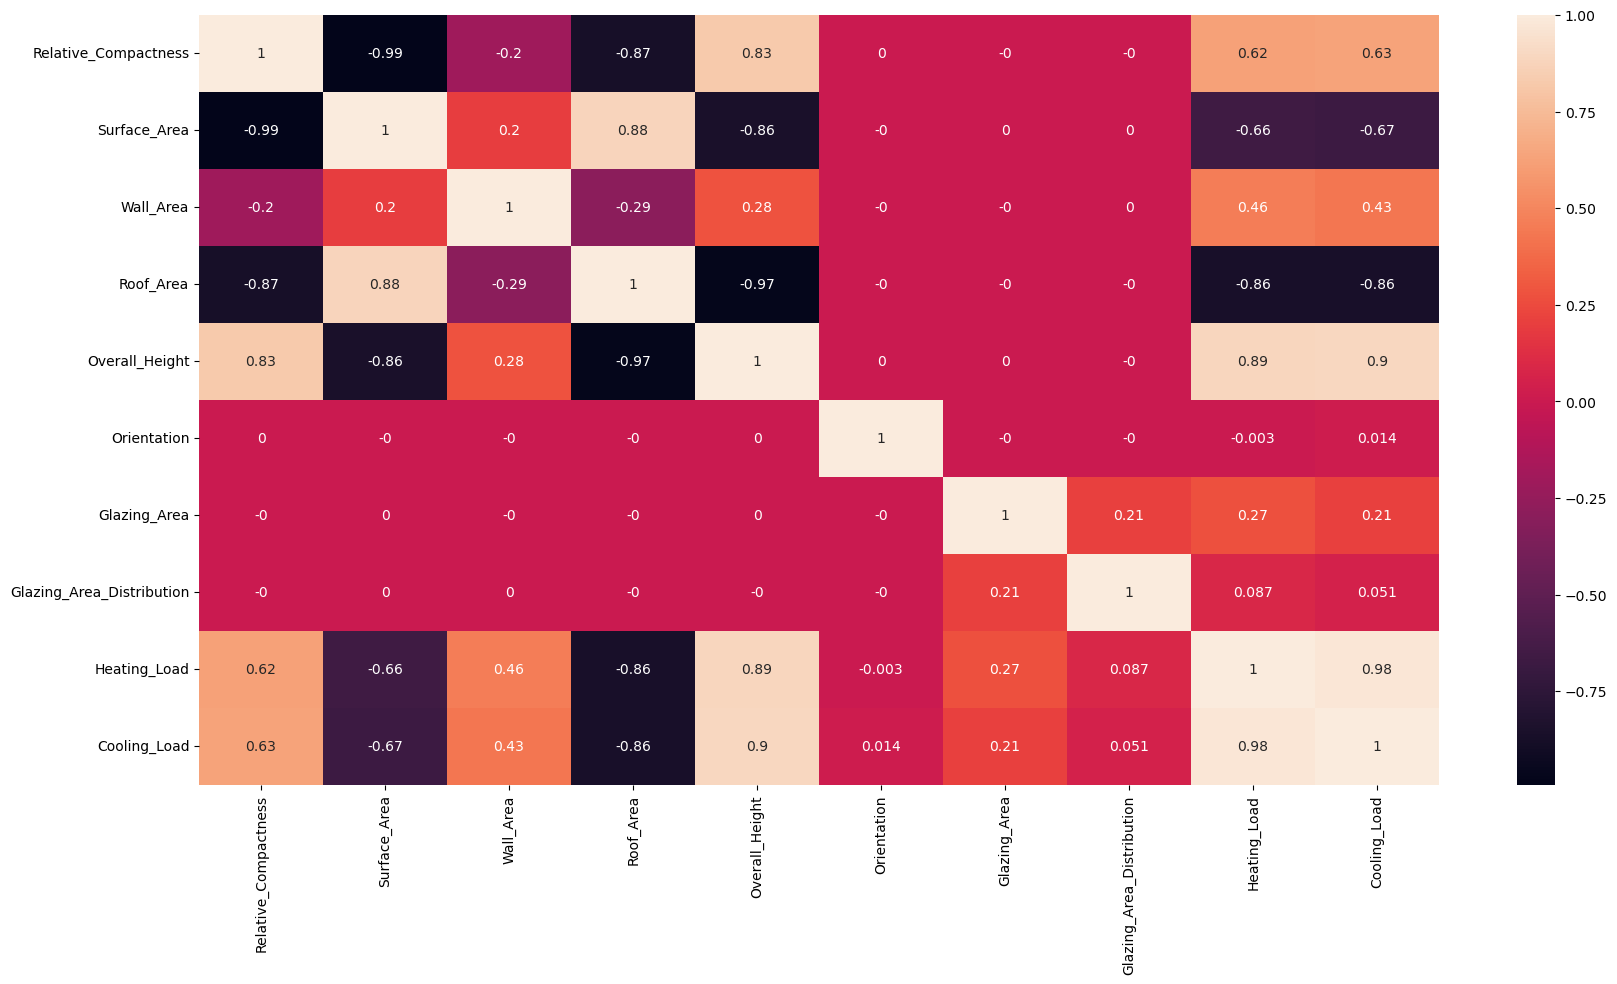

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(round(df.corr(),3), annot=True)

In [43]:
round(df.corr(),5)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.00000,-0.99190,-0.20378,-0.86882,0.82775,0.00000,-0.00000,-0.00000,0.62227,0.63434
Surface_Area,-0.99190,1.00000,0.19550,0.88072,-0.85815,-0.00000,0.00000,0.00000,-0.65812,-0.67300
Wall_Area,-0.20378,0.19550,1.00000,-0.29232,0.28098,-0.00000,-0.00000,0.00000,0.45567,0.42712
Roof_Area,-0.86882,0.88072,-0.29232,1.00000,-0.97251,-0.00000,-0.00000,-0.00000,-0.86183,-0.86255
Overall_Height,0.82775,-0.85815,0.28098,-0.97251,1.00000,0.00000,0.00000,-0.00000,0.88943,0.89579
Orientation,0.00000,-0.00000,-0.00000,-0.00000,0.00000,1.00000,-0.00000,-0.00000,-0.00259,0.01429
Glazing_Area,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,1.00000,0.21296,0.26984,0.20750
Glazing_Area_Distribution,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.21296,1.00000,0.08737,0.05053
Heating_Load,0.62227,-0.65812,0.45567,-0.86183,0.88943,-0.00259,0.26984,0.08737,1.00000,0.97586
Cooling_Load,0.63434,-0.67300,0.42712,-0.86255,0.89579,0.01429,0.20750,0.05053,0.97586,1.00000


Sütunlar arası korelasyon değerleri, veri setindeki sütunlar arasındaki ilişkiyi ölçen istatistiksel bir ölçüdür. Bu değerler, -1 ile 1 arasında değişir.

Pozitif bir korelasyon değeri (+1'e yaklaşan), iki sütun arasında pozitif bir ilişki olduğunu gösterir. Yani bir sütunun değeri arttıkça diğer sütunun değeri de artar. Bu durumda, sütunlar arasında doğrusal bir ilişki olduğu söylenebilir.

Negatif bir korelasyon değeri (-1'e yaklaşan), iki sütun arasında negatif bir ilişki olduğunu gösterir. Yani bir sütunun değeri arttıkça diğer sütunun değeri azalır. Bu durumda da sütunlar arasında doğrusal bir ilişki olduğu söylenebilir.

Korelasyon değeri 0 ise, sütunlar arasında bir ilişki olmadığını veya ilişkinin çok zayıf olduğunu gösterir. Ancak bu durumda bile, iki sütun arasında başka bir ilişki türü olabilir (örneğin, doğrusal olmayan bir ilişki).

Korelasyon değerleri, bir veri setindeki değişkenler arasındaki ilişkileri anlamak için kullanılır. Pozitif veya negatif bir korelasyon, bir değişkenin diğerine olan etkisini gösterir. Ancak, korelasyon, nedensellik hakkında bir sonuç çıkarmak için yeterli değildir. Korelasyon, sadece değişkenler arasındaki ilişkiyi gösterir, ancak bu ilişkinin sebebi veya nedenselliği hakkında bilgi vermez.

## Veri Setimizi Ayırma 

In [ ]:
'''from sklearn.model_selection import train_test_split
veri_seti = df

# Veri setinin özellikleri (X) ve hedef değişkeni (y)
X = veri_seti.drop(['Hedef_Sutun'], axis=1)
y = veri_seti['Hedef_Sutun']

# Veriyi eğitim ve test setlerine ayırma
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)'''

In [55]:
from sklearn.model_selection import train_test_split

veri_seti = df
# Veri setinin özellikleri (X) ve hedef değişkenleri (Y)
X = veri_seti.drop(['Heating_Load','Cooling_Load'], axis=1)
Y = veri_seti[['Heating_Load','Cooling_Load']]

# Veriyi eğitim ve test setlerine ayırma
X_egitim, X_test, Y_egitim, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

## Linear regression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Regresyon modelini oluşturma
model = LinearRegression()
model.fit(X_egitim, Y_egitim)

# Eğitim verileri üzerinde tahmin yapma
y_egitim_tahmin = model.predict(X_egitim)

# Test verileri üzerinde tahmin yapma
y_test_tahmin = model.predict(X_test)
mse_lr = mean_squared_error(Y_test, y_test_tahmin)#


# Eğitim ve test verileri için r2 değerlerini hesaplama
r2_egitim = r2_score(Y_egitim, y_egitim_tahmin)
r2_test = r2_score(Y_test, y_test_tahmin)

print("Eğitim verileri için Lineer Reg R2:", r2_egitim)
print("Test verileri için Lineer Reg R2:", r2_test)
print("Mean Squared Linear",mse_lr)

Eğitim verileri için Lineer Reg R2: 0.8972899826327619
Test verileri için Lineer Reg R2: 0.9044258667136447
Mean Squared Linear 9.23956001046307


## DesicionTree

In [57]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
model.fit(X_egitim, Y_egitim)

y_predict_dt = model.predict(X_test)
r2_dt = r2_score(y_predict_dt,Y_test)
mse_dt = mean_squared_error(Y_test, y_predict_dt)


print("DesicionTree R2",r2_dt)
print("Mean Squared Decision Tree",mse_dt)

DesicionTree R2 0.966104528271975
Mean Squared Decision Tree 3.0855852864583335


In [59]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(Y_test, y_test_tahmin)
r2 = r2_score(Y_test, y_test_tahmin)
mae = mean_absolute_error(Y_test, y_test_tahmin)

print("MSE:", mse)
print("R-squared:", r2)
print("MAE:", mae)

MSE: 9.23956001046307
R-squared: 0.9044258667136447
MAE: 2.163098282492533


## RandomForest

In [63]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def print_score(model):
    y_pred_train = model.predict(X_egitim)
    y_pred_test = model.predict(X_test)
    
    rmse_train = rmse(Y_egitim, y_pred_train)
    rmse_test = rmse(Y_test, y_pred_test)
    
    r2_train = model.score(X_egitim, Y_egitim)
    r2_test = model.score(X_test, Y_test)
    
    print(f"RMSE of train set: {rmse_train}")
    print(f"RMSE of test set: {rmse_test}")
    print(f"R^2 of train set: {r2_train}")
    print(f"R^2 of test set: {r2_test}")

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=40, n_jobs=-1)
model.fit(X_egitim, Y_egitim)

print_score(model)

RMSE of train set: 0.5112687752830467
RMSE of test set: 1.4447027226343523
R^2 of train set: 0.9971051482371248
R^2 of test set: 0.9774403251411683
